In [1]:
import pandas as pd

df = pd.read_csv("./resources/datasets/Almond.csv")

df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [2]:
df.rename(columns={"Unnamed: 0" : "Index", "Thickness (depth)" : "ThicknessDepth", "Length (major axis)" : "LengthMajorAxis", "Width (minor axis)" : "WidthMinorAxis", "Convex hull(convex area)" : "ConvexHullArea"}, inplace=True)
df.set_index("Index", inplace=True)

num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

df.head()

,LengthMajorAxis,WidthMinorAxis,ThicknessDepth,Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,ConvexHullArea,Type
Index,,,,,,,,,,,,,
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LengthMajorAxis  1946 non-null   float64
 1   WidthMinorAxis   1861 non-null   float64
 2   ThicknessDepth   1799 non-null   float64
 3   Area             2803 non-null   float64
 4   Perimeter        2803 non-null   float64
 5   Roundness        1946 non-null   float64
 6   Solidity         2803 non-null   float64
 7   Compactness      2803 non-null   float64
 8   Aspect Ratio     1004 non-null   float64
 9   Eccentricity     1004 non-null   float64
 10  Extent           2803 non-null   float64
 11  ConvexHullArea   2803 non-null   float64
 12  Type             2803 non-null   object 
dtypes: float64(12), object(1)
memory usage: 306.6+ KB


In [4]:
print(df.shape)
df.isna().sum()

(2803, 13)


LengthMajorAxis     857
WidthMinorAxis      942
ThicknessDepth     1004
Area                  0
Perimeter             0
Roundness           857
Solidity              0
Compactness           0
Aspect Ratio       1799
Eccentricity       1799
Extent                0
ConvexHullArea        0
Type                  0
dtype: int64

In [5]:
# See how many symbol
from collections import Counter
combined_text = " ".join(df.apply(lambda x: " ".join(x.astype(str)), axis=1))

symbol_counts = Counter(char for char in combined_text if not char.isalnum() and not char.isspace())

print(symbol_counts)
# Is normal because our data is to many float

Counter({'.': 26378})


**We dont used dropna because the size column will not same**

In [6]:
# 1.] Way, Mean
df_mean = df.fillna(df[num_cols].mean())

print(df_mean.shape)
df_mean.head()

(2803, 13)


,LengthMajorAxis,WidthMinorAxis,ThicknessDepth,Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,ConvexHullArea,Type
Index,,,,,,,,,,,,,
0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,MAMRA
1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,MAMRA
2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,MAMRA
3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,MAMRA
4,290.609274,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,MAMRA


In [7]:
# 2.] Way, Median
df_median = df.fillna(df[num_cols].median())

print(df_median.shape)
df_median.head()

(2803, 13)


,LengthMajorAxis,WidthMinorAxis,ThicknessDepth,Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,ConvexHullArea,Type
Index,,,,,,,,,,,,,
0,279.879883,227.940628,127.759132,22619.0,643.813269,0.472718,0.973384,1.458265,1.705716,0.81012,0.681193,23237.5,MAMRA
1,279.879883,234.188126,128.199509,23038.0,680.984841,0.472718,0.957304,1.601844,1.705716,0.81012,0.656353,24065.5,MAMRA
2,279.879883,229.418610,125.796547,22386.5,646.943212,0.472718,0.967270,1.487772,1.705716,0.81012,0.683620,23144.0,MAMRA
3,279.879883,232.763153,125.918808,22578.5,661.227483,0.472718,0.965512,1.540979,1.705716,0.81012,0.685360,23385.0,MAMRA
4,279.879883,230.150742,107.253448,19068.0,624.842706,0.472718,0.951450,1.629395,1.705716,0.81012,0.714800,20041.0,MAMRA


In [8]:
# 3.] Way, Modus
df_modus = df.fillna(df[num_cols].mode().iloc[0])

print(df_modus.shape)
print(df[num_cols].mode().iloc[0])
df_modus.head()

# I think is not good way if is to many NaN

(2803, 13)
LengthMajorAxis      392.055817
WidthMinorAxis       116.737297
ThicknessDepth        84.924919
Area               10535.000000
Perimeter            460.960458
Roundness              0.229577
Solidity               0.718772
Compactness            2.229812
Aspect Ratio           2.192840
Eccentricity           0.889965
Extent                 0.579072
ConvexHullArea     31150.000000
Name: 0, dtype: float64


,LengthMajorAxis,WidthMinorAxis,ThicknessDepth,Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,ConvexHullArea,Type
Index,,,,,,,,,,,,,
0,392.055817,227.940628,127.759132,22619.0,643.813269,0.229577,0.973384,1.458265,2.19284,0.889965,0.681193,23237.5,MAMRA
1,392.055817,234.188126,128.199509,23038.0,680.984841,0.229577,0.957304,1.601844,2.19284,0.889965,0.656353,24065.5,MAMRA
2,392.055817,229.418610,125.796547,22386.5,646.943212,0.229577,0.967270,1.487772,2.19284,0.889965,0.683620,23144.0,MAMRA
3,392.055817,232.763153,125.918808,22578.5,661.227483,0.229577,0.965512,1.540979,2.19284,0.889965,0.685360,23385.0,MAMRA
4,392.055817,230.150742,107.253448,19068.0,624.842706,0.229577,0.951450,1.629395,2.19284,0.889965,0.714800,20041.0,MAMRA


In [9]:

# 4.] Way, Forward Fill (ffill) or Backward Fill (bfill)
df_ffill = df.ffill()
df_bfill = df.bfill()

# Cleaning again
df_ffill = df_ffill.fillna(df_ffill[num_cols].mean())
df_bfill = df_bfill.fillna(df_bfill[num_cols].mean())

In [10]:
# 5.] Way, SimpleImputer / KNNImputer
from sklearn.impute import SimpleImputer, KNNImputer

simple_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=10)

In [11]:
print("Mean:")
print(df_mean.head())
print("\nMedian:")
print(df_median.head())
print("\nModus:")
print(df_modus.head())
print("\nForward Fill:")
print(df_ffill.head())
print("\nBackward Fill:")
print(df_bfill.head())

Mean:
       LengthMajorAxis  WidthMinorAxis  ThicknessDepth     Area   Perimeter  \
Index                                                                         
0           290.609274      227.940628      127.759132  22619.0  643.813269   
1           290.609274      234.188126      128.199509  23038.0  680.984841   
2           290.609274      229.418610      125.796547  22386.5  646.943212   
3           290.609274      232.763153      125.918808  22578.5  661.227483   
4           290.609274      230.150742      107.253448  19068.0  624.842706   

       Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity    Extent  \
Index                                                                           
0       0.470466  0.973384     1.458265      1.753216      0.813114  0.681193   
1       0.470466  0.957304     1.601844      1.753216      0.813114  0.656353   
2       0.470466  0.967270     1.487772      1.753216      0.813114  0.683620   
3       0.470466  0.965512     1.54

In [12]:
# Merge datasets
datasets = {
    "Mean": df_mean, 
    "Modus": df_modus, 
    "Median": df_median, 
    "FFILL": df_ffill, 
    "BFILL": df_bfill
}

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

results = {"Accuracy":{}, "MAE":{}}

for key, df_ in datasets.items():
    X = df_[num_cols]
    y = df_[cat_cols[0]]

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    
    results["Accuracy"][key] = accuracy
    results["MAE"][key] = mae
        
df_accuracy = pd.DataFrame(list(results['Accuracy'].items()), columns=['Dataset', 'Accuracy'])
df_mae = pd.DataFrame(list(results['MAE'].items()), columns=['Dataset', 'MAE'])

df_ds_basic_result = pd.merge(df_accuracy, df_mae, on='Dataset', how='outer')
df_ds_basic_result

,Dataset,Accuracy,MAE
0,BFILL,0.950059,0.060642
1,FFILL,0.953627,0.054697
2,Mean,0.850178,0.183115
3,Median,0.852556,0.179548
4,Modus,0.845422,0.187872


In [14]:
# Process accurate Impute Type
X = df_ffill[num_cols]
y = df_ffill[cat_cols[0]]
encoder = LabelEncoder()
y = encoder.fit_transform(y)

impute_results = {"Accuracy":{}, "MAE":{}}

X_train_ipt, X_valid_ipt, y_train_ipt, y_valid_ipt = train_test_split(X, y, random_state=0)

X_train_simple_impute = pd.DataFrame(simple_imputer.fit_transform(X_train_ipt))
X_valid_simple_impute = pd.DataFrame(simple_imputer.transform(X_valid_ipt))

X_train_knn_impute = pd.DataFrame(knn_imputer.fit_transform(X_train_ipt))
X_valid_knn_impute = pd.DataFrame(knn_imputer.transform(X_valid_ipt))

def scoring_ds(name,x_t, x_v, y_t, y_v):
    model = RandomForestClassifier(random_state=0)
    model.fit(x_t, y_t)

    y_pred = model.predict(x_v)
    accuracy = accuracy_score(y_v, y_pred)
    mae = mean_absolute_error(y_v, y_pred)
    impute_results["Accuracy"][name] = accuracy
    impute_results["MAE"][name] = mae


scoring_ds("SimpleImpute", X_train_simple_impute, X_valid_simple_impute, y_train_ipt, y_valid_ipt)
scoring_ds("KNNImpute", X_train_knn_impute, X_valid_knn_impute, y_train_ipt, y_valid_ipt)

df_accuracy = pd.DataFrame(list(impute_results['Accuracy'].items()), columns=['Dataset', 'Accuracy'])
df_mae = pd.DataFrame(list(impute_results['MAE'].items()), columns=['Dataset', 'MAE'])

df_impute_results = pd.merge(df_accuracy, df_mae, on='Dataset', how='outer')
df_impute_results

,Dataset,Accuracy,MAE
0,KNNImpute,0.950071,0.057061
1,SimpleImpute,0.950071,0.057061


In [15]:
pd.concat([df_ds_basic_result, df_impute_results], keys=['Basic Results', 'Impute Results'], names=['Result Type', 'Row'])

Dataset  Accuracy       MAE
Result Type    Row                                  
Basic Results  0           BFILL  0.950059  0.060642
               1           FFILL  0.953627  0.054697
               2            Mean  0.850178  0.183115
               3          Median  0.852556  0.179548
               4           Modus  0.845422  0.187872
Impute Results 0       KNNImpute  0.950071  0.057061
               1    SimpleImpute  0.950071  0.057061

In [16]:
# Lets predict
X = df_ffill[num_cols]
y = df_ffill[cat_cols[0]]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train_final, X_valid_final, y_train_final, y_valid_final = train_test_split(X, y, random_state=0, stratify=y)

final_model = RandomForestClassifier(random_state=25, max_leaf_nodes=193)
final_model.fit(X_train_final, y_train_final)
pred = final_model.predict(X_valid_final)
print(f"ACC: {accuracy_score(y_valid_final, pred)} \t MAE: {mean_absolute_error(y_valid_final, pred)}")

ACC: 0.9586305278174037 	 MAE: 0.04850213980028531


In [17]:
df_ffill.tail()

,LengthMajorAxis,WidthMinorAxis,ThicknessDepth,Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,ConvexHullArea,Type
Index,,,,,,,,,,,,,
2798,294.598572,192.709366,122.356506,18471.5,653.345233,0.374527,0.931000,1.838965,1.690899,0.806377,0.725739,19840.5,SANORA
2799,294.598572,186.254745,118.708961,17213.5,581.688379,0.374527,0.952706,1.564234,1.690899,0.806377,0.714016,18068.0,SANORA
2800,294.598572,186.196182,119.147224,17510.5,608.315795,0.374527,0.948821,1.681705,1.690899,0.806377,0.718999,18455.0,SANORA
2801,294.598572,188.660828,120.634438,17941.0,630.759446,0.374527,0.944810,1.764701,1.690899,0.806377,0.738191,18989.0,SANORA
2802,269.356903,176.023636,120.634438,36683.5,887.310743,0.643761,0.947380,1.707933,1.530231,0.756930,0.722429,38721.0,SANORA


In [18]:
real_data = pd.DataFrame({
    'LengthMajorAxis': [294.598572],
    'WidthMinorAxis': [192.709366],
    'ThicknessDepth': [122.356506],
    'Area': [18471.5],
    'Perimeter': [653.345233],
    'Roundness': [0.374527],
    'Solidity': [0.374527],
    'Compactness': [1.838965],
    'Aspect Ratio': [1.690899],
    'Eccentricity': [0.806377],
    'Extent': [0.725739],
    'ConvexHullArea': [19840.5]
})

pred = final_model.predict(real_data, )[0]
if pred == 0:
    print("MAMRA")
elif pred == 1:
    print("SANORA")
elif pred == 2:
    print("REGULER")
else:
    print(f"Out of prediction \n prediction is: {pred}")

REGULER


**MODEL TRAINING VIEW**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0276002	test: 1.0261503	best: 1.0261503 (0)	total: 184ms	remaining: 1m 31s
200:	learn: 0.1425655	test: 0.2237279	best: 0.2237279 (200)	total: 3.83s	remaining: 5.69s
400:	learn: 0.0654223	test: 0.1507763	best: 0.1507763 (400)	total: 6.26s	remaining: 1.55s
499:	learn: 0.0502616	test: 0.1356249	best: 0.1356249 (499)	total: 7.32s	remaining: 0us

bestTest = 0.1356249232
bestIteration = 499



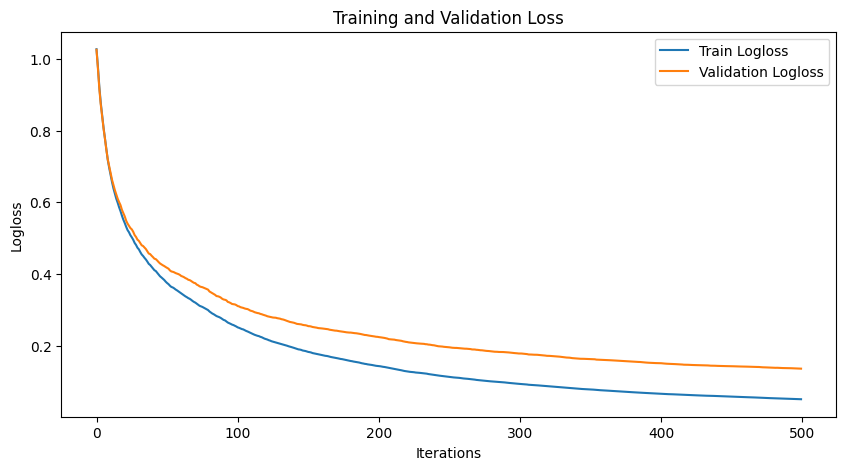

In [25]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Inisialisasi model
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=200)

# Train model
model.fit(X_train_final, y_train_final, plot=True, eval_set=(X_valid_final, y_valid_final))

# Take data to plotting
evals_result = model.get_evals_result()
plt.figure(figsize=(10, 5))

# Plotting train and validation Logloss
plt.plot(evals_result['learn']['MultiClass'], label='Train Logloss')
plt.plot(evals_result['validation']['MultiClass'], label='Validation Logloss')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()